# Evaluación Final Módulo 3

In [101]:
# Importo librerías

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configuración ara poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza

### 1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificarposibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

In [143]:
def dataframe_exploration(file):

    df = pd.read_csv(file)
    
    print("*" * 50,"\n")
    print(f"--- DATAFRAME: {file} ---\n")
    print("*" * 50,"\n")
    
    # Estructura del dataframe y tipos de datos
    print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
    
    print(f"Muestra de filas aleatorias:")
    display(df.sample(5))
    
    print(f"\nTipos de datos por columna:")
    display(pd.DataFrame(df.dtypes, columns = ["tipo_dato"]))
    
    print(f"\nInformacion del DataFrame:")
    display(df.info())
    print("_" * 50,"\n")

    # Valores duplicados
    duplicated_values = df.duplicated().sum()
    duplicated_percentage = round(duplicated_values / df.shape[0] * 100, 2)
    print(f"Numero de duplicados en el conjunto de datos son: {duplicated_values}, un {duplicated_percentage}%.\n")
    print("_" * 50,"\n")

    # Valores nulos
    print("Valores nulos por columna:")
    null_values = df.isnull().sum()
    null_percentage = null_values / df.shape[0] * 100
    df_nulos = pd.DataFrame(null_percentage, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print("_" * 50,"\n")
    
    # Estadisticas basicas para columnas numericas
    col_num = df.select_dtypes(include=["number"])
    if not col_num.empty:
        print("Estadisticas basicas de columnas numericas:")
        df_num_est = pd.DataFrame(col_num.describe().T)
        display(df_num_est)
        
        # Visualizacion de valores atipicos
        print("\nEstadisticas basicas de columnas numericas:")   
        fig, axes = plt.subplots(nrows=1, ncols=len(col_num.columns), figsize=(16, 5))
        for ax, col in zip(axes.flat, col_num.columns):
            sns.boxplot(x=col, data=df, ax=ax)
        plt.tight_layout()
        plt.show()
            
    else:
        print("\nNo hay columnas numericas en el DataFrame.")

    # Mostrar estadisticas basicas para columnas categoricas
    col_cat = df.select_dtypes(include=["object", "category"])
    if not col_cat.empty:
        print("\nEstadisticas basicas de columnas categoricas:")
        df_cat_est = pd.DataFrame(col_cat.describe().T)
        display(df_cat_est)
    else:
        print("\nNo hay columnas categoricas en el DataFrame.\n")

************************************************** 

--- DATAFRAME: Customer Flight Activity.csv ---

************************************************** 

El DataFrame tiene 405624 filas y 10 columnas.

Muestra de filas aleatorias:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
198535,769166,2017,12,0,0,0,0,0.0,0,0
344933,595235,2017,9,2,2,4,948,94.0,595,48
262334,570683,2018,4,0,0,0,0,0.0,0,0
205192,544619,2017,1,0,0,0,0,0.0,0,0
120904,240143,2017,8,0,0,0,0,0.0,0,0



Tipos de datos por columna:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 1864, un 0.46%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



Estadisticas basicas de columnas numericas:


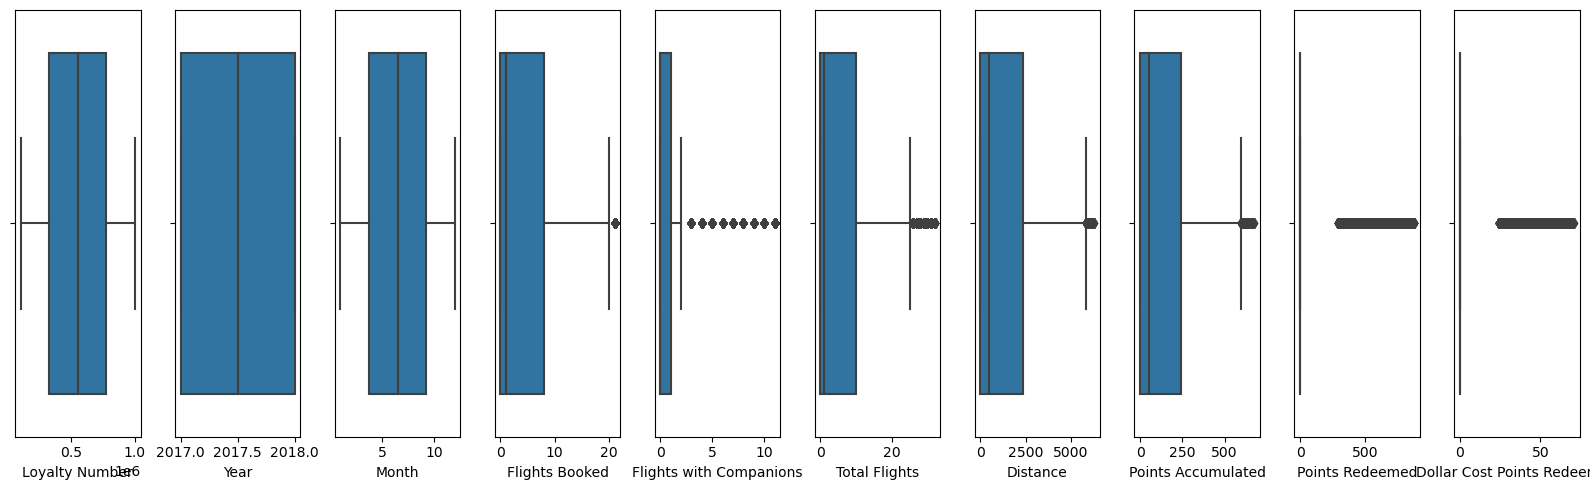


No hay columnas categoricas en el DataFrame.

************************************************** 

--- DATAFRAME: Customer Loyalty History.csv ---

************************************************** 

El DataFrame tiene 16737 filas y 16 columnas.

Muestra de filas aleatorias:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1443,717232,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,70674.0,Divorced,Aurora,5794.68,Standard,2013,2,NaN,NaN
9532,801788,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,83666.0,Married,Nova,21312.38,Standard,2014,9,NaN,NaN
2431,621006,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,54314.0,Married,Aurora,8111.65,Standard,2015,12,NaN,NaN
6449,893555,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Nova,5179.55,Standard,2016,5,2017.0,1.0
6723,967035,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,88134.0,Married,Nova,5503.44,Standard,2013,6,NaN,NaN



Tipos de datos por columna:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 

None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 0, un 0.0%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



Estadisticas basicas de columnas numericas:


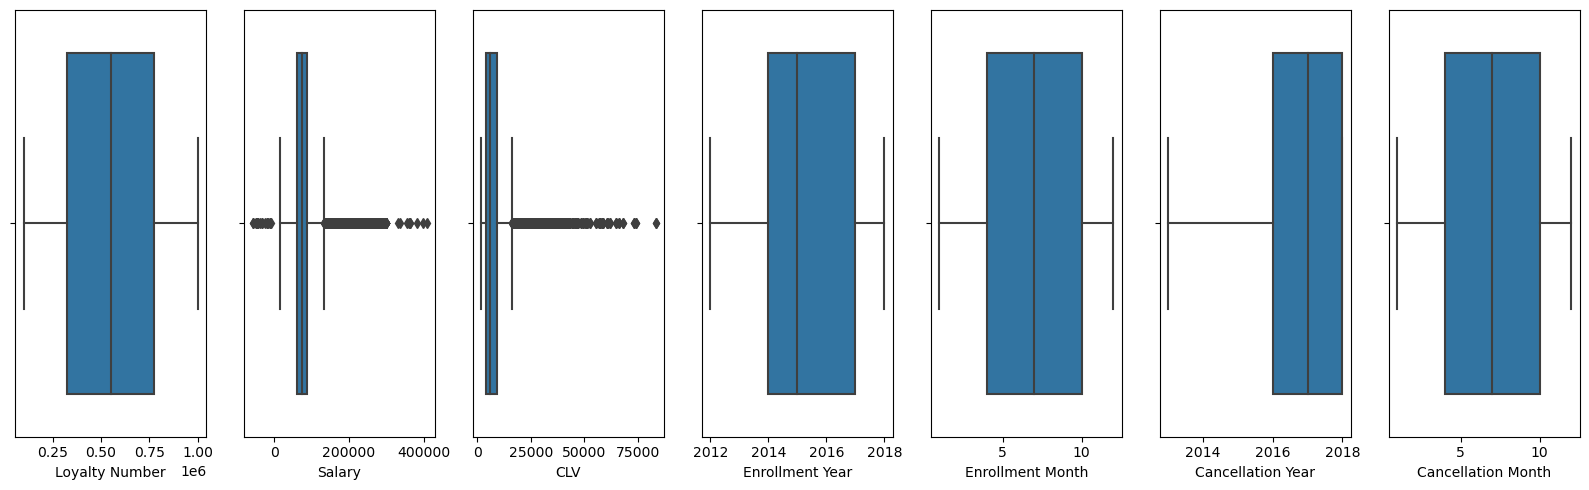


Estadisticas basicas de columnas categoricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [144]:
# Guardo en una lista los archivos que quiero explorar
csv_list = ["Customer Flight Activity.csv", "Customer Loyalty History.csv"]
# Recorro la lista para aplicar la funcion de exploracion a cada archivo
for csv in csv_list:
    dataframe_exploration(csv)

- Une los dos conjuntos de datos de la forma más eficiente.

Para unir los DataFrames, compruebo si tienen alguna columna en común, y en caso de que sí, si los valores únicos de ambas columnas coinciden.

In [153]:
# Guardo cada csv en un Dataframe
df_loyalty = pd.read_csv("Customer Loyalty History.csv")
df_flight = pd.read_csv("Customer Flight Activity.csv")

# Creo una funcion para buscar las columnas en comun y si sus valores unicos coinciden
def verify_common_columns(df1, df2):
    # Verifico columnas comunes usando la interseccion
    common_columns = df1.columns.intersection(df2.columns)
    if common_columns.empty:
        print("No hay columnas con el mismo nombre en ambos DataFrames.")
        return
    else:
        print(f"Ambos DataFrames tienen las siguientes columnas en comun: {common_columns.tolist()}")
    
    # Verifico valores en comun y simetria
    for col in common_columns:
        # Lo convierto a set para quedarme con los valores unicos
        values_df1 = set(df1[col])
        values_df2 = set(df2[col])
        
        if values_df1 == values_df2:
            print(f"Los valores de la columna '{col}' son idénticos en ambos DataFrames.")
        elif values_df1.issubset(values_df2) and values_df2.issubset(values_df1):
            print(f"Los valores de la columna '{col}' son simétricos entre ambos DataFrames.")
        else:
            print(f"Los valores de la columna '{col}' no son simétricos entre ambos DataFrames.")
            
        print(f"La columna {col} del primer DataFrame tiene {df1[col].duplicated().sum()} valores duplicados.")
        print(f"La columna {col} del segundo DataFrame tiene {df2[col].duplicated().sum()} valores duplicados.")
            
verify_common_columns(df_loyalty,df_flight)

Ambos DataFrames tienen las siguientes columnas en comun: ['Loyalty Number']
Los valores de la columna 'Loyalty Number' son idénticos en ambos DataFrames.
La columna Loyalty Number del primer DataFrame tiene 0 valores duplicados.
La columna Loyalty Number del segundo DataFrame tiene 388887 valores duplicados.


Uno los dos DataFrames usando en método `.merge()` basándome en la columna `Loyalty Number` y teniendo en cuenta que en el DataFrame `df_flight` hay valores duplicados en esa columna.

In [181]:
def merge_dataframes(df_left, df_right, col_left, col_right, how='left'):
    return df_left.merge(df_right, how=how, left_on=col_left, right_on=col_right)

In [182]:
df_merged = merge_dataframes(df_flight, df_loyalty, 'Loyalty Number','Loyalty Number')

In [183]:
df_merged.shape[0]

405624

In [184]:
df_merged['Loyalty Number'].value_counts()

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [186]:
filas_seleccionadas = df_merged[df_merged['Loyalty Number'] == 678205]
filas_seleccionadas.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10862,678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
10863,678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
10864,678205,2017,1,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
27763,678205,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN
27764,678205,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,NaN,NaN


### 2. Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

## Fase 2: Visualización

Usando las herramientas de visualización que has aprendido duranteeste módulo, contesta a las siguientes gráficas usando la mejor gráficaque consideres:

**1. ¿Cómo se distribuye la cantidad de vuelos reservados pormes durante el año?**

**2. ¿Existe una relación entre la distancia de los vuelos y lospuntos acumulados por los clientes?**

**3. ¿Cuál es la distribución de los clientes por provincia oestado?**

**4. ¿Cómo se compara el salario promedio entre los diferentesniveles educativos de los clientes?**

**5. ¿Cuál es la proporción de clientes con diferentes tipos detarjetas de fidelidad?**

**6. ¿Cómo se distribuyen los clientes según su estado civil y género?**

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por NivelEducativo

** Objetivo del Ejercicio:** Utilizando un conjunto de datos que hemoscompartido, se busca evaluar si existen diferencias significativas en elnúmero de vuelos reservados según el nivel educativo de los clientes.Para ello, los pasos que deberas seguir son:

**1. Preparación de Datos:**

- Filtra el conjunto de datos para incluir únicamente lascolumnas relevantes: 'Flights Booked' y 'Education'.

**2. Análisis Descriptivo:**

- Agrupa los datos por nivel educativo y calcula estadísticasdescriptivas básicas (como el promedio, la desviaciónestandar, los percentiles) del número de vuelos reservadospara cada grupo.

**3. Prueba Estadística:**

- Realiza una prueba de hipótesis para determinar si existeuna diferencia significativa en el número de vuelosreservados entre los diferentes niveles educativos.